## Project Introduction

In early steps of development of vaccines, diagnostic tests and therapeutic interventions against infections, identification of <b>Linear B-cell epitopes</b> is very important. These are short protein fragments that are recognized by certain components of the immune system. It requires a lot of resources to carry out experimental discovery of epitopes and there has been use of computational methods over the past 3 decades to help in prioritizing candidates for characterization in the lab.

This project is based on predicting the epitopes of <b>Alphavirus</b> which is a genus of <b>mosquito-borne</b> viruses that includes pathogens of medical concert such as <b>Chikungunya</b> and other viruses that affect millions of people, mainly in the Global South but with the potential to migrate to the north due to climatic change.

The objective of this project is to develope an efficient <b>Data mining pipeline</b> to potentially predict new, previously unkown epitopes in viruses based on this genus.

<b>Data</b>

More than one data of the same structure is used in this project. There will be an optimal tradeoff between data using a training data of a smaller amount of data coming from viruses that are more similar to our target ones, and using a lager volume of data coming from potentially different viruses.

More than one classification models will be created then assesed for performance metric using <b>Area under ROC curve (AUC)</b>. The performance metrics will then be compared to identify the one that <b>generalizes</b> better than the other(s). The best one will be used to draw conclusions, make decisions and recommendations in the project's report.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

sc = StandardScaler()

## Exploratory Data Analysis

In [67]:
# enable display of all columns
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [68]:
# load the dataset
dataset = pd.read_csv("df_training_level11.csv")
df = pd.DataFrame(dataset)
df.head()

C:\Users\ojare\AppData\Local\Temp\ipykernel_10780\4208888110.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("df_training_level11.csv")


Info_PepID  Info_organism_id Info_protein_id  Info_pos Info_AA  \
0  CAA51871.1:2             12161      CAA51871.1       685       S   
1  CAA51871.1:2             12161      CAA51871.1       686       R   
2  CAA51871.1:2             12161      CAA51871.1       687       L   
3  CAA51871.1:2             12161      CAA51871.1       688       L   
4  CAA51871.1:2             12161      CAA51871.1       689       E   

  Info_pubmed_id Info_epitope_id Info_host_id Info_nPos Info_nNeg  \
0       11458006           60725     10000000         2         0   
1       11458006           60725     10000000         2         0   
2       11458006           60725     10000000         2         0   
3       11458006           60725     10000000         2         0   
4       11458006           60725     10000000         2         0   

       Info_type      Info_window  Info_cluster  Class  feat_esm1b_0  \
0  Exact Epitope  DHPAAAGSRLLENET           199      1     -0.161401   
1  Exact Epitope  HPAAAGSRLLENETL           199      1      0.097244   
2  Exact Epitope  PAAAGSRLLENETLA           199      1     -0.020377   
3  Exact Epitope  AAAGSRLLENETLAS           199      1      0.052879   
4  Exact Epitope  AAGSRLLENETLASM           199      1     -0.009280   

   feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  \
0      0.016928      0.464730      0.071176     -0.166537     -0.101496   
1      0.187084      0.249089     -0.192334      0.041462      0.040691   
2      0.199993     -0.004241      0.068107      0.013872      0.095657   
3      0.149476     -0.008028      0.098507     -0.024391      0.136488   
4     -0.023794     -0.070194      0.004226     -0.154706     -0.017921   

   feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  feat_esm1b_10  \
0      0.045268     -0.152964     -0.055976      0.127997      -0.025445   
1     -0.047504      0.221144     -0.250569     -0.131633       0.106138   
2     -0.334035      0.215828     -0.230505     -0.010290      -0.154857   
3     -0.263979      0.180176     -0.376252     -0.008542      -0.112206   
4     -0.268468     -0.228312     -0.253118      0.059168       0.203102   

   feat_esm1b_11  feat_esm1b_12  feat_esm1b_13  feat_esm1b_14  feat_esm1b_15  \
0      -0.018457      -0.217846       0.029901       0.092415       0.025475   
1      -0.034672      -0.184777      -0.065697       0.093181      -0.011590   
2       0.204237       0.050229       0.087718      -0.056625      -0.036195   
3       0.191798      -0.058678      -0.010936      -0.127062       0.015423   
4       0.036316      -0.149412       0.073589      -0.062660      -0.084539   

   feat_esm1b_16  feat_esm1b_17  feat_esm1b_18  feat_esm1b_19  feat_esm1b_20  \
0       0.611145      -0.106909       0.078016       0.054915      -0.039597   
1       0.646971      -0.172793       0.263958      -0.023164      -0.055204   
2       0.907587      -0.173824       0.152448      -0.089425       0.168187   
3       0.877834      -0.154183       0.241000      -0.104375       0.115117   
4       0.444940      -0.202034       0.418148      -0.204403       0.051188   

   feat_esm1b_21  feat_esm1b_22  feat_esm1b_23  feat_esm1b_24  feat_esm1b_25  \
0      -0.158053       0.041696       0.397495       0.096363       0.201164   
1       0.032793       0.188240       0.366249       0.372212       0.334254   
2       0.124784       0.086478       0.092348       0.126567      -0.016133   
3       0.056954       0.099144       0.071559       0.120480      -0.010048   
4       0.000854       0.084989       0.462919       0.193409      -0.140709   

   feat_esm1b_26  feat_esm1b_27  feat_esm1b_28  feat_esm1b_29  feat_esm1b_30  \
0      -0.060241       0.050932      -0.188752      -0.032883       0.360890   
1      -0.020253       0.086040      -0.109744       0.070096       0.367421   
2       0.025750      -0.093338      -0.077541      -0.001497       0.311619   
3       0.073209      -0.208795      -0.098471       0.0849

In [69]:
print("Number of Rows: {}".format(df.shape[0]))
print("Number of Columns: {}".format(df.shape[1]))

Number of Rows: 746
Number of Columns: 1294


In [70]:
# Extract info subset from the dataset
info_subset = df[["Info_PepID", "Info_organism_id", "Info_protein_id", "Info_pos", "Info_AA", "Info_pubmed_id", "Info_epitope_id", "Info_host_id", "Info_nPos", "Info_nNeg", "Info_type", "Info_window", "Info_cluster"]]
info_subset.head()

Info_PepID  Info_organism_id Info_protein_id  Info_pos Info_AA  \
0  CAA51871.1:2             12161      CAA51871.1       685       S   
1  CAA51871.1:2             12161      CAA51871.1       686       R   
2  CAA51871.1:2             12161      CAA51871.1       687       L   
3  CAA51871.1:2             12161      CAA51871.1       688       L   
4  CAA51871.1:2             12161      CAA51871.1       689       E   

  Info_pubmed_id Info_epitope_id Info_host_id Info_nPos Info_nNeg  \
0       11458006           60725     10000000         2         0   
1       11458006           60725     10000000         2         0   
2       11458006           60725     10000000         2         0   
3       11458006           60725     10000000         2         0   
4       11458006           60725     10000000         2         0   

       Info_type      Info_window  Info_cluster  
0  Exact Epitope  DHPAAAGSRLLENET           199  
1  Exact Epitope  HPAAAGSRLLENETL           199  
2  Exact Epitope  PAAAGSRLLENETLA           199  
3  Exact Epitope  AAAGSRLLENETLAS           199  
4  Exact Epitope  AAGSRLLENETLASM           199

In [71]:
# check for null values
info_subset.isna().sum()

Info_PepID          0
Info_organism_id    0
Info_protein_id     0
Info_pos            0
Info_AA             0
Info_pubmed_id      0
Info_epitope_id     0
Info_host_id        0
Info_nPos           0
Info_nNeg           0
Info_type           0
Info_window         0
Info_cluster        0
dtype: int64

No null values for this subset

In [72]:
# drop some unncessary columns
info_subset.drop(["Info_AA", "Info_window", "Info_organism_id", "Info_protein_id", "Info_pubmed_id", "Info_epitope_id", "Info_host_id"], axis = 1, inplace=True)
info_subset.head()

C:\Users\ojare\AppData\Local\Temp\ipykernel_10780\257406916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_subset.drop(["Info_AA", "Info_window", "Info_organism_id", "Info_protein_id", "Info_pubmed_id", "Info_epitope_id", "Info_host_id"], axis = 1, inplace=True)


Info_PepID  Info_pos Info_nPos Info_nNeg      Info_type  Info_cluster
0  CAA51871.1:2       685         2         0  Exact Epitope           199
1  CAA51871.1:2       686         2         0  Exact Epitope           199
2  CAA51871.1:2       687         2         0  Exact Epitope           199
3  CAA51871.1:2       688         2         0  Exact Epitope           199
4  CAA51871.1:2       689         2         0  Exact Epitope           199

In [73]:
info_subset.describe()

Info_pos  Info_cluster
count   746.000000    746.000000
mean    123.189008    222.260054
std     248.480251     36.833483
min       1.000000    199.000000
25%      49.000000    204.000000
50%      83.000000    204.000000
75%     123.000000    215.000000
max    2498.000000    320.000000

In [74]:
info_subset.dtypes

Info_PepID      object
Info_pos         int64
Info_nPos       object
Info_nNeg       object
Info_type       object
Info_cluster     int64
dtype: object

In [75]:
info_subset["Info_type"].value_counts()

Epitope containing region/antigenic site                  340
Exact Epitope                                             311
Exact Epitope,Epitope containing region/antigenic site     62
Epitope containing region/antigenic site,Exact Epitope     33
Name: Info_type, dtype: int64

There are four types of values in the Info_type feature with the majority being the (Epitope containing region/antigenic site) and the the minority being the (Epitope containing region/antigenic site,Exact Epitope)

In [76]:
info_subset["Info_cluster"].value_counts()

204    516
298     69
229     54
320     42
199     30
215     20
264      8
256      7
Name: Info_cluster, dtype: int64

There are 8 value types in the Info_cluster feature. The majority cluster is the (cluster 204) and the smallest cluster is the (cluster 256)

In [77]:
# save figures as png images
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"/ "end_to_end_projects/"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

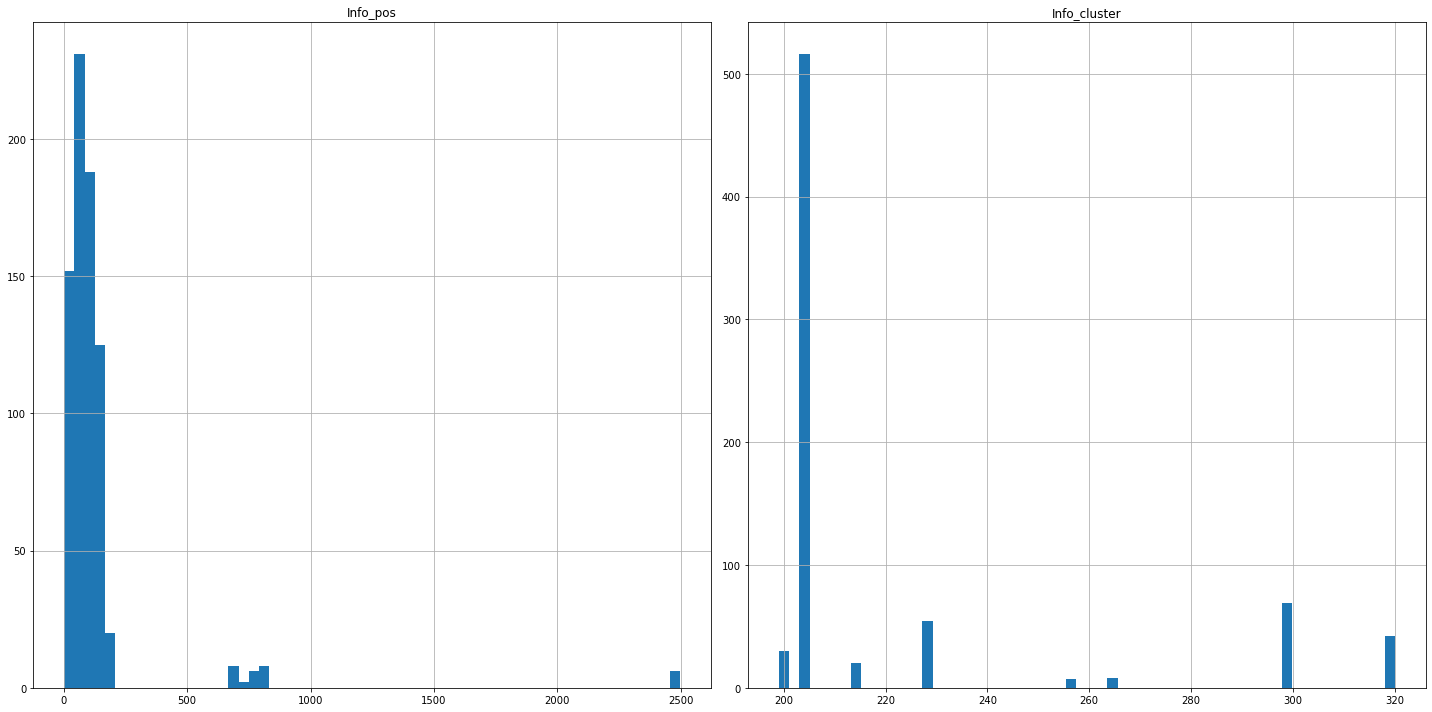

In [78]:
# info subset's distribution using a histogram
info_subset.hist(bins=60, figsize=(20,10))
save_fig("info_subset_distribution")

In [79]:
df.head()

Info_PepID  Info_organism_id Info_protein_id  Info_pos Info_AA  \
0  CAA51871.1:2             12161      CAA51871.1       685       S   
1  CAA51871.1:2             12161      CAA51871.1       686       R   
2  CAA51871.1:2             12161      CAA51871.1       687       L   
3  CAA51871.1:2             12161      CAA51871.1       688       L   
4  CAA51871.1:2             12161      CAA51871.1       689       E   

  Info_pubmed_id Info_epitope_id Info_host_id Info_nPos Info_nNeg  \
0       11458006           60725     10000000         2         0   
1       11458006           60725     10000000         2         0   
2       11458006           60725     10000000         2         0   
3       11458006           60725     10000000         2         0   
4       11458006           60725     10000000         2         0   

       Info_type      Info_window  Info_cluster  Class  feat_esm1b_0  \
0  Exact Epitope  DHPAAAGSRLLENET           199      1     -0.161401   
1  Exact Epitope  HPAAAGSRLLENETL           199      1      0.097244   
2  Exact Epitope  PAAAGSRLLENETLA           199      1     -0.020377   
3  Exact Epitope  AAAGSRLLENETLAS           199      1      0.052879   
4  Exact Epitope  AAGSRLLENETLASM           199      1     -0.009280   

   feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  \
0      0.016928      0.464730      0.071176     -0.166537     -0.101496   
1      0.187084      0.249089     -0.192334      0.041462      0.040691   
2      0.199993     -0.004241      0.068107      0.013872      0.095657   
3      0.149476     -0.008028      0.098507     -0.024391      0.136488   
4     -0.023794     -0.070194      0.004226     -0.154706     -0.017921   

   feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  feat_esm1b_10  \
0      0.045268     -0.152964     -0.055976      0.127997      -0.025445   
1     -0.047504      0.221144     -0.250569     -0.131633       0.106138   
2     -0.334035      0.215828     -0.230505     -0.010290      -0.154857   
3     -0.263979      0.180176     -0.376252     -0.008542      -0.112206   
4     -0.268468     -0.228312     -0.253118      0.059168       0.203102   

   feat_esm1b_11  feat_esm1b_12  feat_esm1b_13  feat_esm1b_14  feat_esm1b_15  \
0      -0.018457      -0.217846       0.029901       0.092415       0.025475   
1      -0.034672      -0.184777      -0.065697       0.093181      -0.011590   
2       0.204237       0.050229       0.087718      -0.056625      -0.036195   
3       0.191798      -0.058678      -0.010936      -0.127062       0.015423   
4       0.036316      -0.149412       0.073589      -0.062660      -0.084539   

   feat_esm1b_16  feat_esm1b_17  feat_esm1b_18  feat_esm1b_19  feat_esm1b_20  \
0       0.611145      -0.106909       0.078016       0.054915      -0.039597   
1       0.646971      -0.172793       0.263958      -0.023164      -0.055204   
2       0.907587      -0.173824       0.152448      -0.089425       0.168187   
3       0.877834      -0.154183       0.241000      -0.104375       0.115117   
4       0.444940      -0.202034       0.418148      -0.204403       0.051188   

   feat_esm1b_21  feat_esm1b_22  feat_esm1b_23  feat_esm1b_24  feat_esm1b_25  \
0      -0.158053       0.041696       0.397495       0.096363       0.201164   
1       0.032793       0.188240       0.366249       0.372212       0.334254   
2       0.124784       0.086478       0.092348       0.126567      -0.016133   
3       0.056954       0.099144       0.071559       0.120480      -0.010048   
4       0.000854       0.084989       0.462919       0.193409      -0.140709   

   feat_esm1b_26  feat_esm1b_27  feat_esm1b_28  feat_esm1b_29  feat_esm1b_30  \
0      -0.060241       0.050932      -0.188752      -0.032883       0.360890   
1      -0.020253       0.086040      -0.109744       0.070096       0.367421   
2       0.025750      -0.093338      -0.077541      -0.001497       0.311619   
3       0.073209      -0.208795      -0.098471       0.0849

In [80]:
# Examine the class feature
df["Class"].value_counts()

 1    457
-1    289
Name: Class, dtype: int64

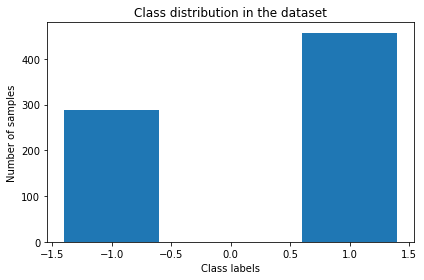

In [81]:
# check for class imbalances
unique_labels, counts = np.unique(df["Class"], return_counts=True)
plt.bar(unique_labels, counts)
plt.xlabel("Class labels")
plt.ylabel("Number of samples")
plt.title("Class distribution in the dataset")
save_fig("class_distribution")
plt.show()

From the above analysis, the classes are imbalanced

In [82]:
df["Class"].isna().sum()

0

There are no null values in the Class Feature

In [83]:
# Extract feat subset from the dataset for analysis
feat_subset = df.iloc[:, 14:]
feat_subset.head()

feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
0     -0.161401      0.016928      0.464730      0.071176     -0.166537   
1      0.097244      0.187084      0.249089     -0.192334      0.041462   
2     -0.020377      0.199993     -0.004241      0.068107      0.013872   
3      0.052879      0.149476     -0.008028      0.098507     -0.024391   
4     -0.009280     -0.023794     -0.070194      0.004226     -0.154706   

   feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  \
0     -0.101496      0.045268     -0.152964     -0.055976      0.127997   
1      0.040691     -0.047504      0.221144     -0.250569     -0.131633   
2      0.095657     -0.334035      0.215828     -0.230505     -0.010290   
3      0.136488     -0.263979      0.180176     -0.376252     -0.008542   
4     -0.017921     -0.268468     -0.228312     -0.253118      0.059168   

   feat_esm1b_10  feat_esm1b_11  feat_esm1b_12  feat_esm1b_13  feat_esm1b_14  \
0      -0.025445      -0.018457      -0.217846       0.029901       0.092415   
1       0.106138      -0.034672      -0.184777      -0.065697       0.093181   
2      -0.154857       0.204237       0.050229       0.087718      -0.056625   
3      -0.112206       0.191798      -0.058678      -0.010936      -0.127062   
4       0.203102       0.036316      -0.149412       0.073589      -0.062660   

   feat_esm1b_15  feat_esm1b_16  feat_esm1b_17  feat_esm1b_18  feat_esm1b_19  \
0       0.025475       0.611145      -0.106909       0.078016       0.054915   
1      -0.011590       0.646971      -0.172793       0.263958      -0.023164   
2      -0.036195       0.907587      -0.173824       0.152448      -0.089425   
3       0.015423       0.877834      -0.154183       0.241000      -0.104375   
4      -0.084539       0.444940      -0.202034       0.418148      -0.204403   

   feat_esm1b_20  feat_esm1b_21  feat_esm1b_22  feat_esm1b_23  feat_esm1b_24  \
0      -0.039597      -0.158053       0.041696       0.397495       0.096363   
1      -0.055204       0.032793       0.188240       0.366249       0.372212   
2       0.168187       0.124784       0.086478       0.092348       0.126567   
3       0.115117       0.056954       0.099144       0.071559       0.120480   
4       0.051188       0.000854       0.084989       0.462919       0.193409   

   feat_esm1b_25  feat_esm1b_26  feat_esm1b_27  feat_esm1b_28  feat_esm1b_29  \
0       0.201164      -0.060241       0.050932      -0.188752      -0.032883   
1       0.334254      -0.020253       0.086040      -0.109744       0.070096   
2      -0.016133       0.025750      -0.093338      -0.077541      -0.001497   
3      -0.010048       0.073209      -0.208795      -0.098471       0.084977   
4      -0.140709      -0.052636      -0.045372      -0.213410       0.084128   

   feat_esm1b_30  feat_esm1b_31  feat_esm1b_32  feat_esm1b_33  feat_esm1b_34  \
0       0.360890      -0.036424       0.089256       0.145992       0.066571   
1       0.367421       0.146448       0.024983       0.062548      -0.136945   
2       0.311619      -0.029834       0.153143       0.022204       0.184119   
3       0.208305      -0.098761       0.215097      -0.001795       0.159713   
4      -0.152816       0.005110      -0.075464       0.205178      -0.078474   

   feat_esm1b_35  feat_esm1b_36  feat_esm1b_37  feat_esm1b_38  feat_esm1b_39  \
0      -0.011142      -0.010758       0.397922      -0.054120       0.415749   
1       0.037801      -0.277522       0.581065      -0.206318       0.352086   
2      -0.007388      -0.025035       0.538571      -0.148609      -0.139866   
3      -0.045185       0.009310       0.478350      -0.118763      -0.133811   
4      -0.068821       0.057092       0.498493      -0.036777       0.133373   

   feat_esm1b_40  feat_esm1b_41  feat_esm1b_42  feat_esm1b_43  feat_esm1b_44  \
0       0.281505      -0.223405       0.171512       0.128265       0.037255   
1       0.250162      -0.077263       0.276400      -0.

In [84]:
feat_subset.describe()

feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
count    746.000000    746.000000    746.000000    746.000000    746.000000   
mean       0.081334      0.155190      0.045183      0.093532     -0.187883   
std        0.134752      0.135894      0.153447      0.126711      0.150018   
min       -0.605968     -0.368321     -0.453714     -0.270026     -0.623107   
25%       -0.005342      0.056017     -0.045173      0.007387     -0.283482   
50%        0.093366      0.159134      0.050690      0.102058     -0.190992   
75%        0.177607      0.248278      0.140758      0.177299     -0.090165   
max        0.431492      0.533593      0.464730      0.484326      0.291663   

       feat_esm1b_5  feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  \
count    746.000000    746.000000    746.000000    746.000000    746.000000   
mean      -0.079048      0.002961     -0.013465     -0.093546      0.045785   
std        0.171420      0.171293      0.189475      0.146342      0.127296   
min       -0.587313     -0.546888     -0.428600     -0.537224     -0.508726   
25%       -0.200325     -0.115509     -0.157970     -0.188088     -0.047907   
50%       -0.087125     -0.000722     -0.023049     -0.095882      0.046730   
75%        0.035861      0.120766      0.114863      0.006965      0.137709   
max        0.476413      0.527441      0.568731      0.384280      0.433851   

       feat_esm1b_10  feat_esm1b_11  feat_esm1b_12  feat_esm1b_13  \
count     746.000000     746.000000     746.000000     746.000000   
mean        0.223785       0.138321      -0.098738       0.111116   
std         0.185179       0.167071       0.143225       0.155082   
min        -0.301504      -0.343799      -0.451884      -0.233047   
25%         0.098794       0.013757      -0.197907       0.003397   
50%         0.213527       0.146931      -0.101535       0.100473   
75%         0.337382       0.251056      -0.010864       0.206804   
max         0.829225       0.632106       0.494185       0.723860   

       feat_esm1b_14  feat_esm1b_15  feat_esm1b_16  feat_esm1b_17  \
count     746.000000     746.000000     746.000000     746.000000   
mean        0.052035       0.058317       0.445057      -0.052093   
std         0.131887       0.157132       0.202809       0.125562   
min        -0.376576      -0.504780      -0.106471      -0.563114   
25%        -0.028581      -0.048064       0.312317      -0.125674   
50%         0.056457       0.055451       0.442820      -0.046057   
75%         0.141736       0.164556       0.570310       0.029333   
max         0.508045       0.533832       1.060138       0.300144   

       feat_esm1b_18  feat_esm1b_19  feat_esm1b_20  feat_esm1b_21  \
count     746.000000     746.000000     746.000000     746.000000   
mean        0.055580      -0.133956       0.080097       0.011625   
std         0.137072       0.144354       0.145586       0.145199   
min        -0.683071      -0.627233      -0.506430      -0.391343   
25%        -0.030118      -0.228021      -0.020999      -0.085909   
50%         0.060542      -0.125990       0.079341       0.014303   
75%         0.141139      -0.037341       0.170332       0.107241   
max         0.462127       0.284256       0.522646       0.639311   

       feat_esm1b_22  feat_esm1b_23  feat_esm1b_24  feat_esm1b_25  \
count     746.000000     746.000000     746.000000     746.000000   
mean       -0.042408       0.224585      -0.074705       0.140849   
std         0.115454       0.157571       0.199318       0.189877   
min        -0.428021      -0.235543      -0.609428      -0.398994   
25%        -0.122878       0.121815      -0.205845       0.005475   
50%        -0.035940       0.214391      -0.074266       0.130182   
75%         0.030757       0.339260       0.056950       0.271410   
max         0.270585       0.871573       0.549644       0.679806   

       feat_esm1b_26  feat_esm1b_27  feat_esm1b_28  feat_esm1b_29  \
count     746.000000     7

In [85]:
feat_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Columns: 1280 entries, feat_esm1b_0 to feat_esm1b_1279
dtypes: float64(1280)
memory usage: 7.3 MB


### Under Sampling

Number of Unique Cluster numbers:  8


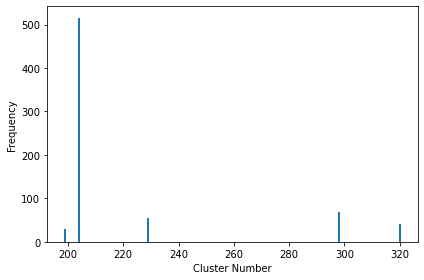

In [86]:
# Graph of Info_clusters and frequency
freq_cluster = df["Info_cluster"].value_counts()
cluster_number = []
frequency_count = []
for key, value in freq_cluster.items():
    cluster_number.append(key)
    frequency_count.append(value)
print("Number of Unique Cluster numbers: ", len(freq_cluster))

# graph of top 5 cluster numbers
top_values = 5
plt.bar(cluster_number[:top_values], frequency_count[:top_values])
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
save_fig("frequent_cluster_numbers")
plt.show()

Number of unique info types:  4


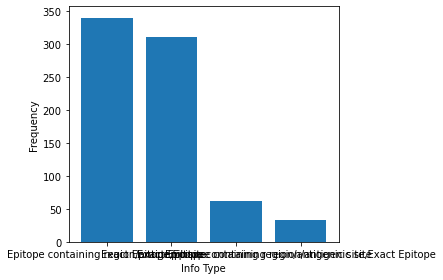

In [87]:
# Graph of Info_type and Frequency
freq_type = df["Info_type"].value_counts()
info_type = []
frequency_count = []
for key, value in freq_type.items():
    info_type.append(key)
    frequency_count.append(value)
print("Number of unique info types: ", len(freq_type))

# graph of top 5 info types
top_values = 5
plt.bar(info_type[:top_values], frequency_count[:top_values])
plt.xlabel("Info Type")
plt.ylabel("Frequency")
save_fig("frequency_info_type")
plt.show()

Number of Unique Classes:  2


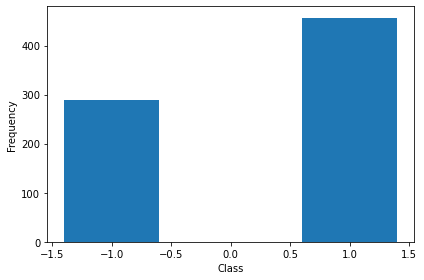

In [88]:
# a graph of class and frequency
freq_class = df["Class"].value_counts()
class_number = []
frequency_count = []
for key, value in freq_class.items():
    class_number.append(key)
    frequency_count.append(value)
print("Number of Unique Classes: ", len(freq_class))
top_values = 5
plt.bar(class_number[:top_values], frequency_count[:top_values])
plt.xlabel("Class")
plt.ylabel("Frequency")
save_fig("classes_frequency")
plt.show()

In [89]:
# filtering the info_types which have more than 250 rows (occurrences)

requiredInfoType = []
for key, values in freq_type.items():
    if (value >= 250):
        requiredInfoType.append(key)

print(requiredInfoType)

['Epitope containing region/antigenic site', 'Exact Epitope', 'Exact Epitope,Epitope containing region/antigenic site', 'Epitope containing region/antigenic site,Exact Epitope']


In [90]:
# filtering clusters which have more than 50 rows (occurrences)
requiredCluster = []
for key, value in freq_cluster.items():
    if (value >= 50):
        requiredCluster.append(key)
    
print(requiredCluster)

[204, 298, 229]


In [91]:
# filtering class which has more than 250 rows (occurrences)
requiredClass = []
for key, value in freq_class.items():
    if (value >= 250):
        requiredClass.append(key)
        
print(requiredClass)

[1, -1]


In [92]:
# # taking the random 33 data from the requiredInfoType and forming the dataset
# listofDataFrames = []
# for info_type in requiredInfoType:
#     listofDataFrames.append(pd.DataFrame(df[df["Info_type"] == info_type].sample(n = 33)))
    
# sampledData = pd.concat(listofDataFrames)
# sampledData.shape

In [93]:
# taking random 250 from the requiredClass and forming the dataset
listofDataFrames = []
for class_num in requiredClass:
    listofDataFrames.append(pd.DataFrame(df[df["Class"] == class_num].sample(n = 250)))
    
sampledData = pd.concat(listofDataFrames)
sampledData.shape

(500, 1294)

In [94]:
# taking random rows and shuffling the dataframe
data = sampledData.sample(frac=1, random_state=1).reset_index()

# remove the rows that contain NULL values
data.dropna(inplace=True)
data.dropna(axis="columns")
data.reset_index(drop=True, inplace=True)

# remove columns which contains zeroes in the data
data = data.loc[:, (data != 0).any(axis=0)]

In [95]:
print("Shape after removing rows with NULL Values")
print("Number of Rows {}".format(data.shape[0]))
print("Number of Columns {}".format(data.shape[1]))

Shape after removing rows with NULL Values
Number of Rows 500
Number of Columns 1295


In [96]:
# converting the Info type column to required format (int)
# using LabelEncoder function from sklearn.preprocession library
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(data['Info_type'])
data['Info_type'] = encoder.transform(data['Info_type'])
values = encoder.inverse_transform(data['Info_type'])
type_column = data['Info_type']

# mapping the encoded value
encoded_type_column = {}
for i in range(len(data['Info_type'])):
    encoded_type_column[data['Info_type'][i]] = values[i]

print(encoded_type_column)

{0: 'Epitope containing region/antigenic site', 1: 'Epitope containing region/antigenic site,Exact Epitope', 2: 'Exact Epitope', 3: 'Exact Epitope,Epitope containing region/antigenic site'}


In [97]:
# get all the column heads
data.columns

Index(['index', 'Info_PepID', 'Info_organism_id', 'Info_protein_id',
       'Info_pos', 'Info_AA', 'Info_pubmed_id', 'Info_epitope_id',
       'Info_host_id', 'Info_nPos',
       ...
       'feat_esm1b_1270', 'feat_esm1b_1271', 'feat_esm1b_1272',
       'feat_esm1b_1273', 'feat_esm1b_1274', 'feat_esm1b_1275',
       'feat_esm1b_1276', 'feat_esm1b_1277', 'feat_esm1b_1278',
       'feat_esm1b_1279'],
      dtype='object', length=1295)

In [115]:
# removing extra columns that are not useful for finding correlation
# axis =1 because we need to drop the columns
dataset = data.drop(["index", "Info_PepID", "Info_organism_id", "Info_protein_id", "Info_AA", "Info_pubmed_id", "Info_epitope_id", "Info_host_id", "Info_nPos", "Info_nNeg", "Info_type", "Info_window"], axis=1)

x_dataset = dataset.drop(["Class"], axis = 1)
y_dataset = dataset["Class"]

# normal dataseet
X_train, X_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# dataset.head()

## Correlation Matrix

In [116]:
# finding the correlation matrix
correlation_matrix = dataset.corr()
correlation_matrix.head()

Info_pos  Info_cluster     Class  feat_esm1b_0  feat_esm1b_1  \
Info_pos      1.000000     -0.115782  0.169394     -0.226044     -0.117525   
Info_cluster -0.115782      1.000000  0.423853     -0.230854      0.076323   
Class         0.169394      0.423853  1.000000     -0.180908      0.004422   
feat_esm1b_0 -0.226044     -0.230854 -0.180908      1.000000      0.107907   
feat_esm1b_1 -0.117525      0.076323  0.004422      0.107907      1.000000   

              feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  feat_esm1b_5  \
Info_pos          0.067739     -0.106072      0.154098      0.052987   
Info_cluster     -0.126750     -0.178042     -0.299526     -0.207141   
Class             0.024226     -0.137239     -0.108053     -0.115244   
feat_esm1b_0      0.063451     -0.143745      0.091203      0.025877   
feat_esm1b_1     -0.110746     -0.120833     -0.035864     -0.078165   

              feat_esm1b_6  feat_esm1b_7  feat_esm1b_8  feat_esm1b_9  \
Info_pos         -0.134278     -0.050528     -0.127629     -0.111398   
Info_cluster     -0.028631     -0.016444     -0.160649     -0.132197   
Class            -0.022249      0.019411     -0.159017     -0.084414   
feat_esm1b_0     -0.033685      0.138262     -0.102781      0.145645   
feat_esm1b_1     -0.012885      0.082931      0.113473      0.056753   

              feat_esm1b_10  feat_esm1b_11  feat_esm1b_12  feat_esm1b_13  \
Info_pos          -0.219145       0.058399       0.062119       0.093389   
Info_cluster       0.105919      -0.149478       0.277582       0.068979   
Class             -0.126795      -0.103837       0.052212       0.077499   
feat_esm1b_0       0.031725       0.043244       0.082788      -0.114528   
feat_esm1b_1       0.100174       0.042736      -0.125693       0.076880   

              feat_esm1b_14  feat_esm1b_15  feat_esm1b_16  feat_esm1b_17  \
Info_pos          -0.012494      -0.086917       0.052881       0.000711   
Info_cluster       0.096197      -0.203987       0.252602      -0.191726   
Class             -0.015839      -0.163434       0.249672      -0.082328   
feat_esm1b_0      -0.149727       0.104889      -0.243637       0.002754   
feat_esm1b_1       0.045047       0.070556       0.011784      -0.096952   

              feat_esm1b_18  feat_esm1b_19  feat_esm1b_20  feat_esm1b_21  \
Info_pos           0.104804      -0.082785      -0.038627       0.170296   
Info_cluster       0.134890       0.046508      -0.004213       0.087926   
Class              0.171504      -0.012387       0.027280       0.048729   
feat_esm1b_0       0.111144      -0.191309       0.181856      -0.099679   
feat_esm1b_1       0.071145       0.170906       0.204478      -0.024089   

              feat_esm1b_22  feat_esm1b_23  feat_esm1b_24  feat_esm1b_25  \
Info_pos           0.084948       0.017032       0.072196      -0.139436   
Info_cluster       0.048880      -0.126004       0.427157      -0.178812   
Class              0.073533      -0.070629       0.297668      -0.110429   
feat_esm1b_0      -0.030688      -0.023926      -0.126346       0.155592   
feat_esm1b_1      -0.079336      -0.195126       0.097719      -0.124764   

              feat_esm1b_26  feat_esm1b_27  feat_esm1b_28  feat_esm1b_29  \
Info_pos          -0.077607      -0.018756       0.023883       0.290678   
Info_cluster      -0.050590      -0.144192      -0.168328       0.169301   
Class             -0.136745      -0.071471      -0.160386       0.175308   
feat_esm1b_0      -0.061567       0.074147       0.192802      -0.053869   
feat_esm1b_1      -0.038585       0.012111       0.253178      -0.178680   

              feat_esm1b_30  feat_esm1b_31  feat_esm1b_32  feat_esm1b_33  \
Info_pos           0.065880      -0.024144       0.243914       0.060720   
Info_cluster      -0.104745      -0.205308      -0.002787       0.099888   
Class             -0.034330      -0.059978       0.066206       0.023193   
feat_esm1b_0      -0.186987      -0.091365      -0.113259      -0.076168   
feat_esm1b_1  

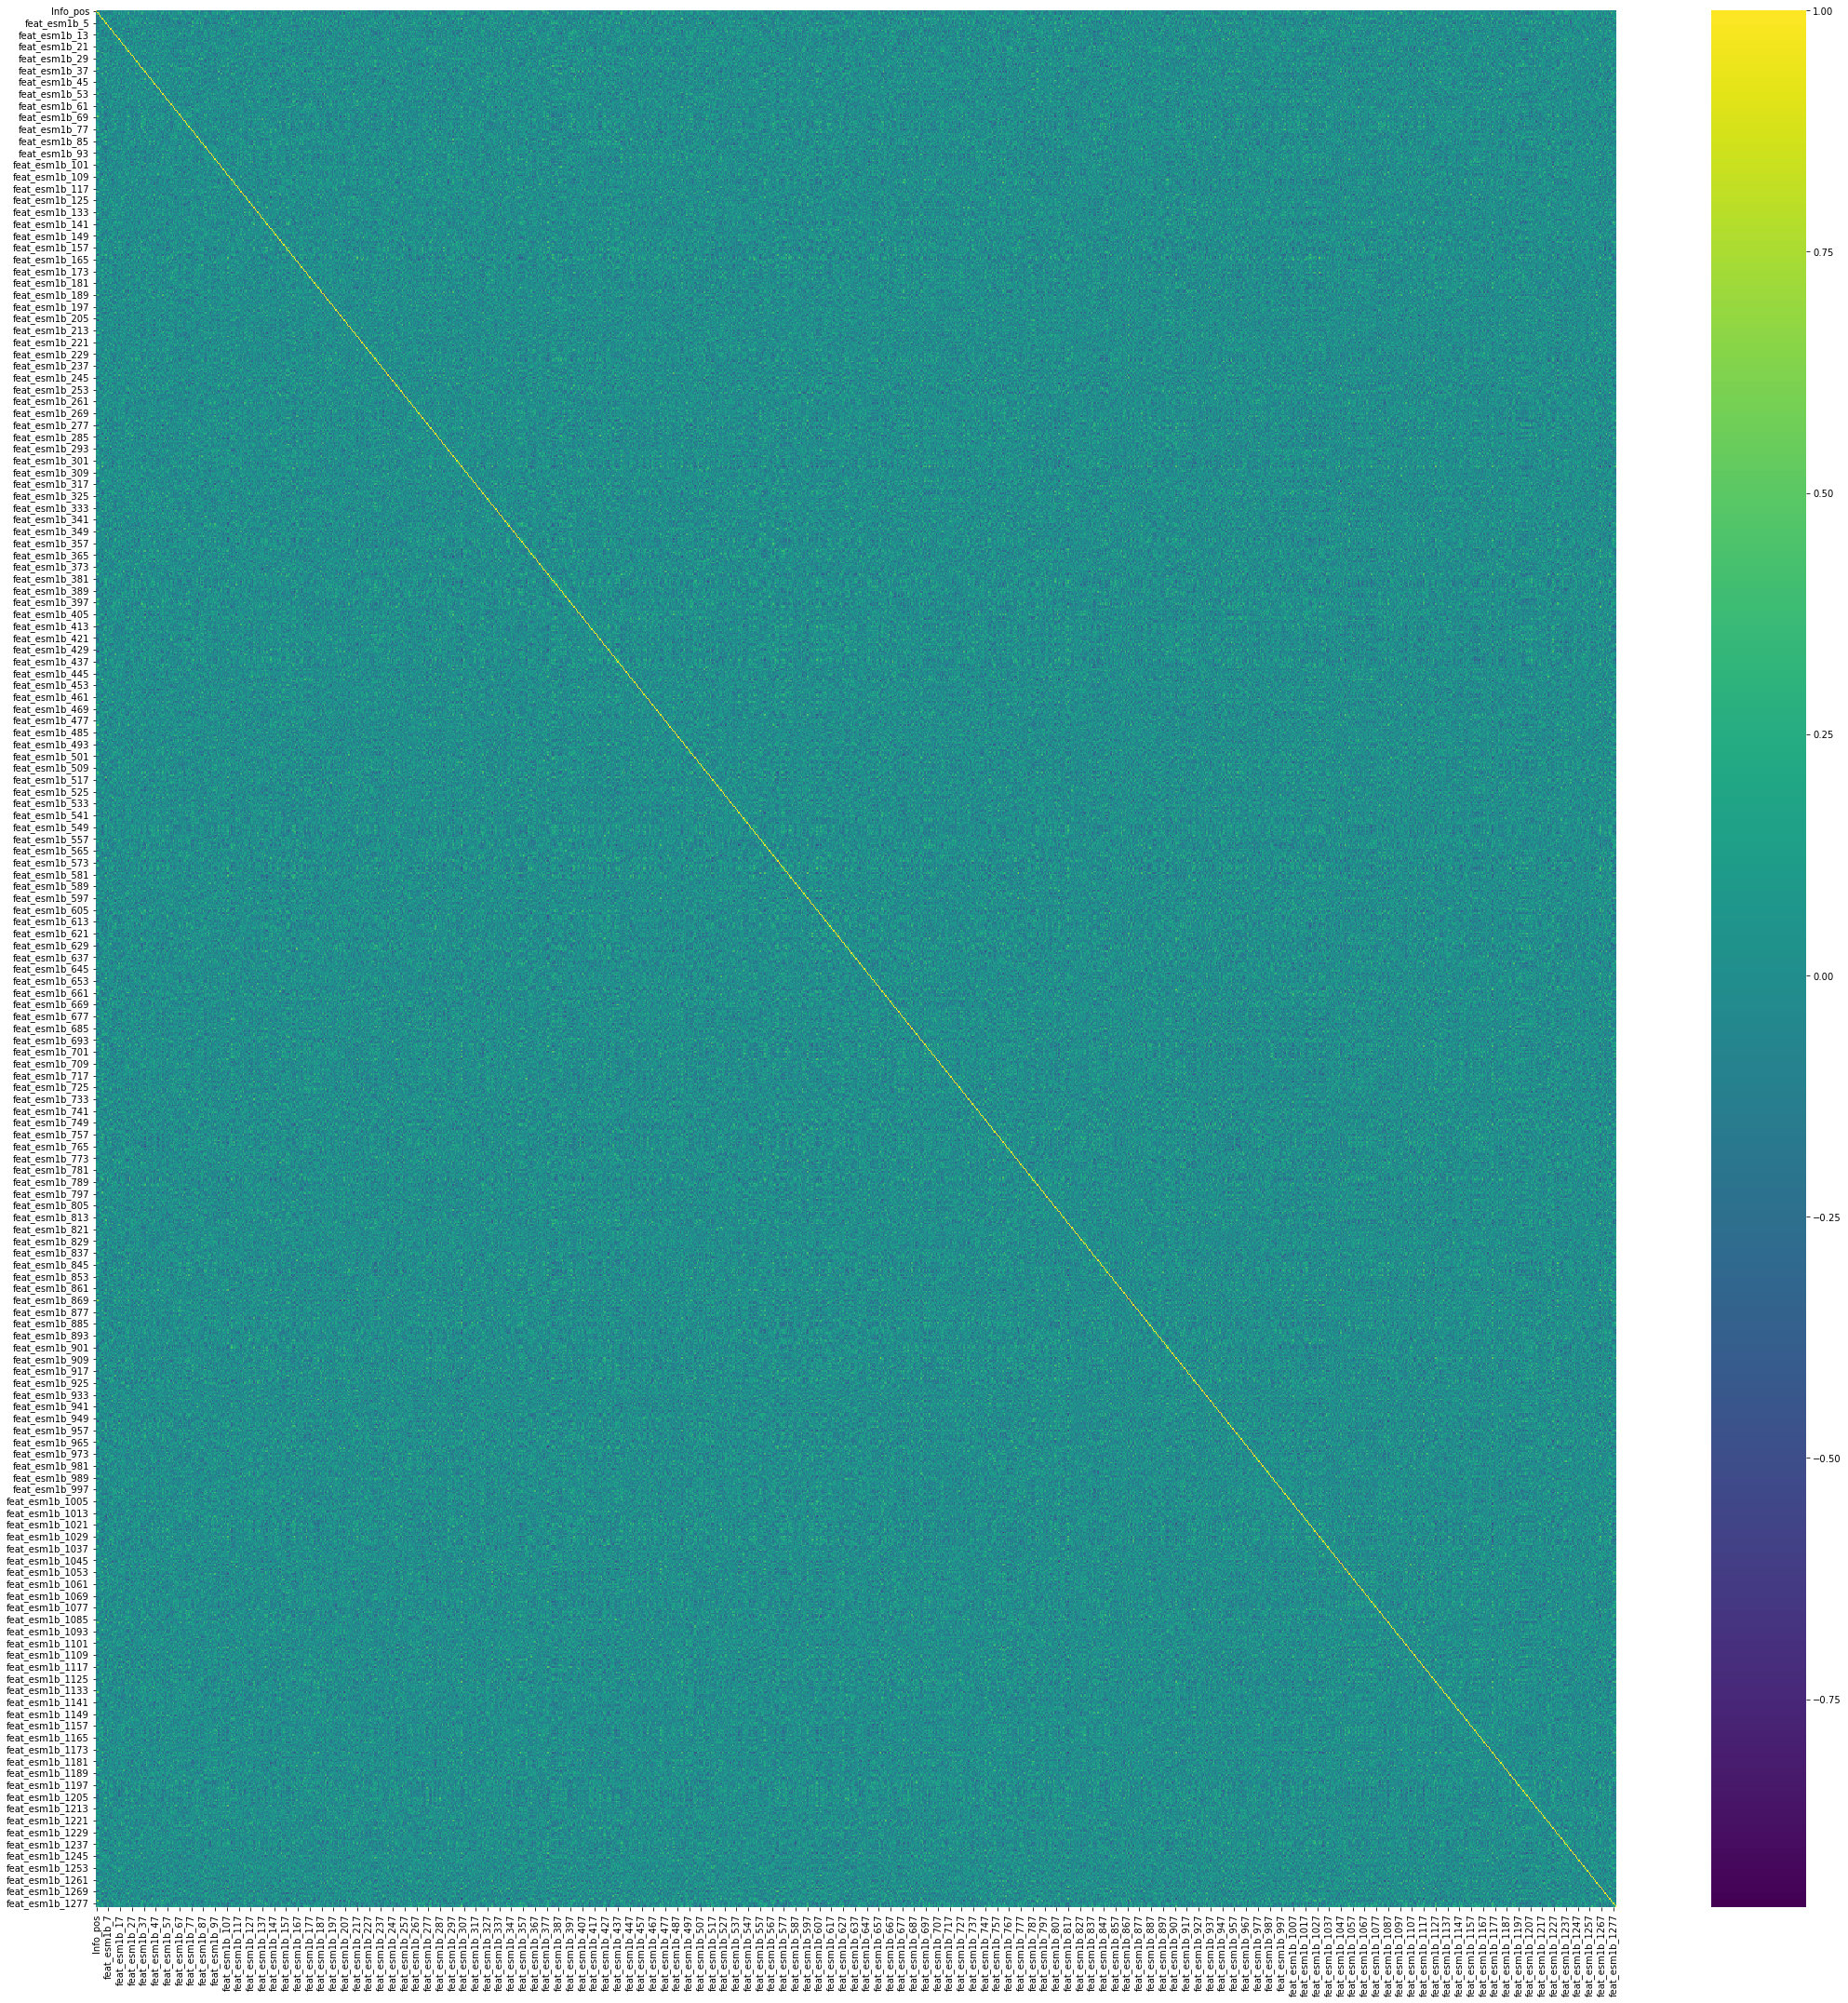

In [117]:
# plotting the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap="viridis")
save_fig("correlation_matrix_heatmap")
plt.show()

### Feature Selection via Correlation Matrix

In [118]:
sorted_corr_matrix_class = correlation_matrix["Class"].sort_values(ascending=False)
allkeys = list(sorted_corr_matrix_class.keys())

# removing the target column
allkeys.remove("Class")

feature_map = {}

# removing the features which has less than 0.01 correlation
# and grouping the columns which have same correlation (rounding upto 2 decimal places)
for colName in allkeys:
    correlation = round(sorted_corr_matrix_class[colName], 2)
    if (abs(correlation) >= 0.01):
        if correlation in feature_map:
            feature_map[correlation].append(colName)
        else:
            feature_map[correlation] = [colName]
        
print("Columns with absolute correlation greater than 0.01 with Class: \n")
print(feature_map)

Columns with absolute correlation greater than 0.01 with Class: 

{0.42: ['Info_cluster'], 0.36: ['feat_esm1b_440', 'feat_esm1b_279'], 0.34: ['feat_esm1b_1087'], 0.33: ['feat_esm1b_869'], 0.3: ['feat_esm1b_99', 'feat_esm1b_480', 'feat_esm1b_1019', 'feat_esm1b_24'], 0.29: ['feat_esm1b_657', 'feat_esm1b_398'], 0.28: ['feat_esm1b_466', 'feat_esm1b_68', 'feat_esm1b_448', 'feat_esm1b_306'], 0.27: ['feat_esm1b_1243', 'feat_esm1b_395', 'feat_esm1b_1275', 'feat_esm1b_1134'], 0.26: ['feat_esm1b_1113', 'feat_esm1b_658', 'feat_esm1b_1098', 'feat_esm1b_1185', 'feat_esm1b_931', 'feat_esm1b_513', 'feat_esm1b_1259', 'feat_esm1b_146', 'feat_esm1b_305', 'feat_esm1b_84'], 0.25: ['feat_esm1b_163', 'feat_esm1b_16', 'feat_esm1b_965', 'feat_esm1b_274', 'feat_esm1b_844'], 0.24: ['feat_esm1b_90', 'feat_esm1b_52', 'feat_esm1b_119', 'feat_esm1b_967', 'feat_esm1b_36', 'feat_esm1b_964', 'feat_esm1b_153', 'feat_esm1b_378', 'feat_esm1b_988', 'feat_esm1b_731', 'feat_esm1b_134', 'feat_esm1b_829'], 0.23: ['feat_esm1b_

In [119]:
# choosing the random features from same correlated values
final_features = []

import random

for correlation, column_list in feature_map.items():
    final_features.append(random.choice(column_list))
    
print("Number of Features to be Taken: ", len(final_features))

print("Randomly selected columns for each correlation value: ")
print(final_features)

pos_value_columns = final_features

Number of Features to be Taken:  68
Randomly selected columns for each correlation value: 
['Info_cluster', 'feat_esm1b_440', 'feat_esm1b_1087', 'feat_esm1b_869', 'feat_esm1b_480', 'feat_esm1b_398', 'feat_esm1b_68', 'feat_esm1b_395', 'feat_esm1b_513', 'feat_esm1b_274', 'feat_esm1b_90', 'feat_esm1b_863', 'feat_esm1b_240', 'feat_esm1b_938', 'feat_esm1b_999', 'feat_esm1b_1267', 'feat_esm1b_739', 'feat_esm1b_1228', 'feat_esm1b_326', 'feat_esm1b_530', 'feat_esm1b_1222', 'feat_esm1b_148', 'feat_esm1b_962', 'feat_esm1b_884', 'feat_esm1b_508', 'feat_esm1b_757', 'feat_esm1b_182', 'feat_esm1b_117', 'feat_esm1b_691', 'feat_esm1b_103', 'feat_esm1b_1183', 'feat_esm1b_1199', 'feat_esm1b_257', 'feat_esm1b_42', 'feat_esm1b_482', 'feat_esm1b_1014', 'feat_esm1b_706', 'feat_esm1b_386', 'feat_esm1b_918', 'feat_esm1b_1006', 'feat_esm1b_199', 'feat_esm1b_937', 'feat_esm1b_958', 'feat_esm1b_752', 'feat_esm1b_738', 'feat_esm1b_669', 'feat_esm1b_665', 'feat_esm1b_332', 'feat_esm1b_211', 'feat_esm1b_162', 'feat

In [121]:
# final data which would be used for predition and spliting
data_for_prediction_featureSelection = data[pos_value_columns]
target_column = data["Class"]

# splitting data for feature selection via correlation matrix
feature_train, feature_test, target_train, target_test = train_test_split(data_for_prediction_featureSelection, target_column, test_size=0.2)

sc = StandardScaler()
feature_train = sc.fit_transform(feature_train)
feature_test = sc.transform(feature_test)

data_for_prediction_featureSelection

Info_cluster  feat_esm1b_440  feat_esm1b_1087  feat_esm1b_869  \
0             204        0.096289        -0.141777       -0.178629   
1             204       -0.165361        -0.059366       -0.283693   
2             204        0.158876        -0.055972       -0.267746   
3             204        0.001550        -0.204381       -0.163109   
4             204       -0.090404        -0.343749       -0.157030   
..            ...             ...              ...             ...   
495           204       -0.059680        -0.303958       -0.399583   
496           204        0.176307        -0.067300       -0.262685   
497           204       -0.166865        -0.182607       -0.303527   
498           204        0.006130        -0.259608       -0.389150   
499           204        0.062170        -0.070592       -0.197600   

     feat_esm1b_480  feat_esm1b_398  feat_esm1b_68  feat_esm1b_395  \
0         -0.222051       -0.215017      -0.265082        0.015422   
1          0.248635       -0.060982      -0.175239       -0.166295   
2          0.022221       -0.086688      -0.391864       -0.261817   
3          0.117055       -0.202614      -0.076247       -0.118800   
4          0.021845       -0.062973      -0.303547        0.099033   
..              ...             ...            ...             ...   
495        0.190391       -0.253807      -0.265369       -0.165952   
496        0.436535        0.031313      -0.180845       -0.322385   
497        0.139289       -0.172108      -0.201520       -0.077306   
498       -0.104148       -0.316868      -0.142206       -0.095787   
499        0.138039       -0.077264      -0.378868       -0.163738   

     feat_esm1b_513  feat_esm1b_274  feat_esm1b_90  feat_esm1b_863  \
0         -0.261323       -0.204739       0.241070       -0.014839   
1         -0.060554       -0.091835       0.153402        0.177115   
2         -0.122617       -0.155732       0.153110        0.190792   
3         -0.375381       -0.705452       0.112946        0.004941   
4         -0.354113       -0.179381      -0.130541        0.176237   
..              ...             ...            ...             ...   
495       -0.248829       -0.182407       0.202538       -0.105350   
496       -0.090657       -0.240005       0.157183       -0.005144   
497        0.005786       -0.234562       0.045721       -0.088312   
498       -0.245261       -0.224602      -0.098173       -0.178635   
499       -0.192911       -0.126190       0.285183        0.331633   

     feat_esm1b_240  feat_esm1b_938  feat_esm1b_999  feat_esm1b_1267  \
0         -0.014367        0.044016        0.168505         0.080667   
1          0.138115       -0.055292       -0.083944        -0.146105   
2          0.153468        0.275339       -0.069686         0.028253   
3          0.130442        0.142653       -0.078258        -0.117442   
4          0.027863       -0.110634       -0.164150         0.082316   
..              ...             ...             ...              ...   
495        0.308032        0.406456        0.207485        -0.120493   
496        0.133783        0.081029       -0.095110        -0.028054   
497        0.239463        0.068302        0.148874        -0.071532   
498        0.122183       -0.246324       -0.132138        -0.223039   
499        0.163130        0.162621       -0.089283         0.209979   

     feat_esm1b_739  feat_esm1b_1228  feat_esm1b_326  feat_esm1b_530  \
0         -0.049124        -0.127942        0.246717       -0.015875   
1         -0.124205        -0.167911       -0.008025       -0.251550   
2          0.037741        -0.168259        0.153017       -0.220720   
3         -0.127853        -0.080756        0.142135       -0.133594   
4         -0.154495        -0.524727        0.044562       -0.453667   
..              ...              ...             ...             ...   
495        0.094845        -0.074221       -0.096376       -0.238673   
496        0.117095        -0.196583     

In [122]:
# standardizing the dataset and splitting the original data
feature_train_std, feature_test_std, target_train_std, target_test_std = train_test_split(x_dataset, y_dataset, test_size=0.2)

sc = StandardScaler()
feature_train_std = sc.fit_transform(feature_train_std)
feature_test_std  = sc.transform(feature_test_std)

In [125]:
final_result = {"Random Forest": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0},
               "Logistic Regression": {"Feature Selection": 0, "PCA": 0, "K-Cross FOlding": 0, "Original": 0},
               "Decision Tree": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0}}
f1Scores = {"Random Forest": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0},
               "Logistic Regression": {"Feature Selection": 0, "PCA": 0, "K-Cross FOlding": 0, "Original": 0},
               "Decision Tree": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0}}
numberOfFeatures = {"Random Forest": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0},
               "Logistic Regression": {"Feature Selection": 0, "PCA": 0, "K-Cross FOlding": 0, "Original": 0},
               "Decision Tree": {"Feature Selection": 0, "PCA": 0, "K-Cross Folding": 0, "Original": 0}}

## Principal Component Analysis

In [127]:
pca = PCA(n_components=30)
feature_train_pca = pca.fit_transform(feature_train_std)
feature_test_pca = pca.transform(feature_test_std)
print(feature_train_pca.shape, feature_test_pca.shape)

(400, 30) (100, 30)
